In [1]:
import time

# obsługa danych
import numpy as np
import pandas as pd

#wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# datasets
from sklearn.datasets import load_boston, fetch_openml
from sklearn.utils import check_random_state

### Dane

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per \$10,000 

**PTRATIO:** Pupil-teacher ratio by town 

**LSTAT:** Percentage of lower status of the population 

**MEDV:** Median value of owner-occupied homes in \\$1000s

In [3]:
# Załadujmy zbiór danych dotyczących cen mieszkań w Bostonie
boston_dataset = load_boston()

# Wrzucamy zbiór w pandasowy DataFrame, żeby móc na nim wygodnie wykonywać różne operacje
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Zwraca pierwszych pięć rekordów DataFrama
boston.head()
# Dodajemy brakująca kolumnę, której wartość później będziemy próbowali przewidzieć
boston["MEDV"] = boston_dataset.target

### Krótkie przypomnienie funkcjonalności z zeszłego tygodnia :)

In [4]:
# Pierwsze 5 rekordów z naszego zbioru
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Podział kolumn na te, które przewidujemy i te, na podstawie których przewidujemy
            
y_col = 'MEDV'
feature_columns = [col for col in boston.columns.to_list() if col != y_col]

# Ile i jakich danych brakuje?
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# Krótkie podsumowanie danych ilościowych
boston.drop(['CHAS'], axis=1).describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

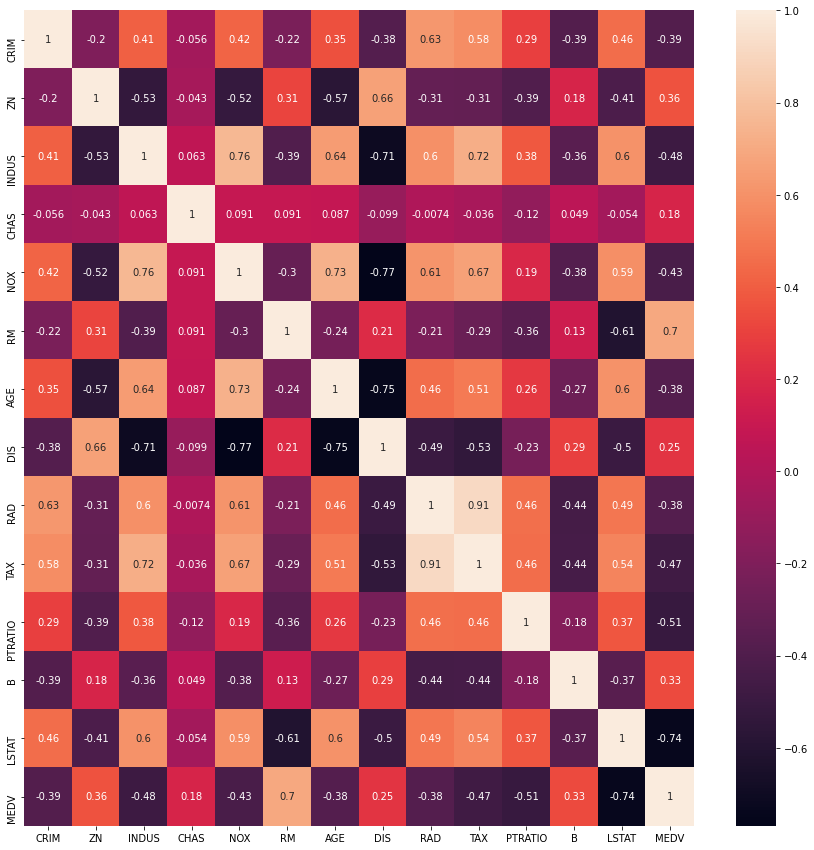

In [7]:
# Korelacja
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(boston.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

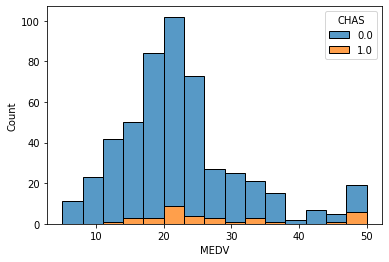

In [8]:
sns.histplot(boston, x=y_col, hue='CHAS', multiple='stack', bins=15)

In [9]:
def draw_multiple(data, y, feature_columns, chart_type='scatter'):
    """
    Funkcja wyświetlająca zbiorczo wykresy
    """
    if chart_type == 'box':
        fig, axs = plt.subplots(2, data.shape[1]//2, figsize=[20, 10])
    else:
        fig, axs = plt.subplots(data.shape[1]//2, 2, figsize=[20,40])
    axs = axs.flatten()
    idx = 0
    for feature in feature_columns:
        if chart_type == 'box':
            sns.boxplot(y=feature, data=data[[feature]], ax=axs[idx])
        else:
            data.plot(y=y, x=feature, kind=chart_type, ax=axs[idx])
        idx += 1

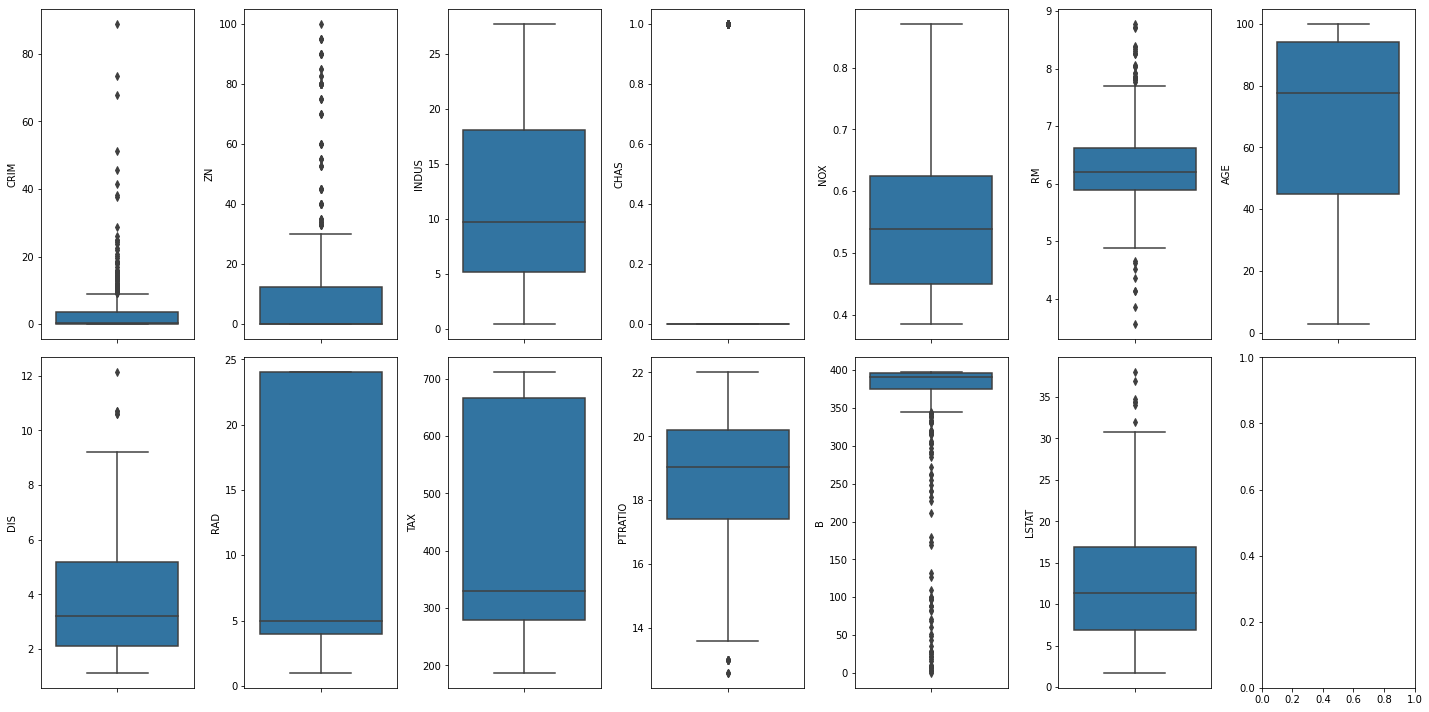

In [10]:
# Wyświetlamy sobie boxploty

draw_multiple(boston, y_col, feature_columns, chart_type='box')
plt.tight_layout()

## Regresja liniowa

#### Przydatne linki: 

https://en.wikipedia.org/wiki/Simple_linear_regression

https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a

https://en.wikipedia.org/wiki/Gradient_descent

https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76

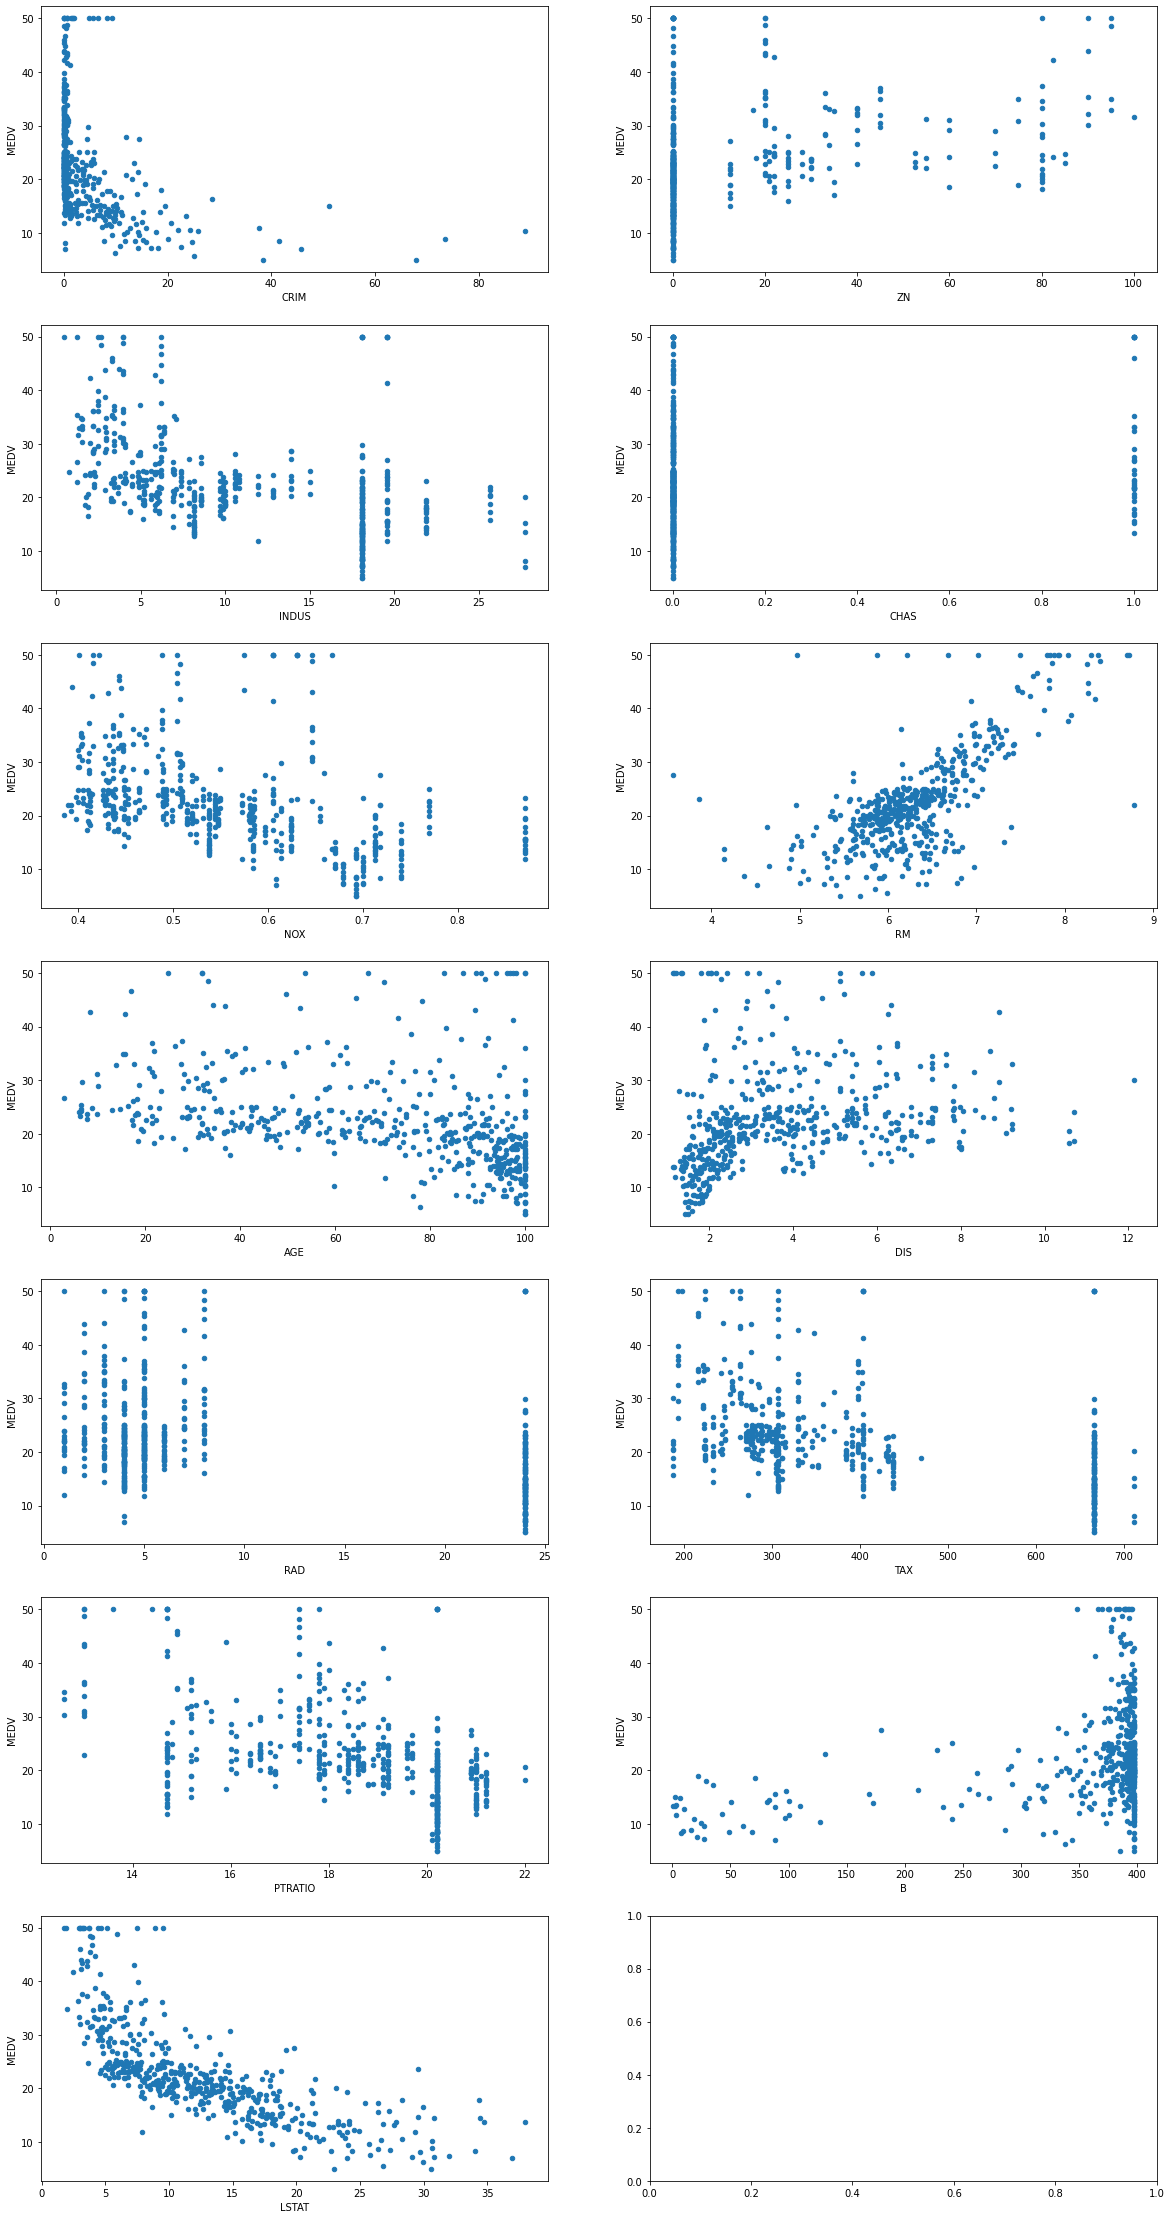

In [11]:
# zobaczmy najpierw jak wyglądają wykresy kolumna – szukana wartość

draw_multiple(boston, y_col, feature_columns, 'scatter')

### Biblioteki:

In [12]:
# modele
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# metryki
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
# podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

In [13]:
def split_train_measure(data, chosen_features, t_ratio, model):
    """
    Funkcja robiąca wszystko na raz i zwracająca model
    """
    # dzielimy na zbiory treningowe i testowe
    boston_train, boston_test = train_test_split(boston, test_size=t_ratio, random_state=2138)
    # sanity check
    print('Sizes:', boston.shape[0], boston.shape[0]*t_ratio, boston_train.shape[0], boston_test.shape[0])

    # dzielimy oba zbiory na wejście i wyjście
    X_train, X_test = boston_train[chosen_features], boston_test[chosen_features]
    y_train, y_test = boston_train[y_col], boston_test[y_col]
    
    # tworzymy model regresyjny...
    trained_model = model

    # ... trenujemy go na danych ...
    trained_model.fit(X_train, y_train)

    # ... a następnie sprawdzamy jak sobie poradził
    y_pred_train = trained_model.predict(X_train)
    y_pred_test = trained_model.predict(X_test)
    
    print('Mean squared error on training data:', mean_squared_error(y_train, y_pred_train))
    print('Mean squared error on test data:', mean_squared_error(y_test, y_pred_test))
    
    return trained_model

In [14]:
# wybieramy kolumny, których użyjemy w trenowaniu modelu (arbitralnie)
chosen_features = ['RM', 'DIS', 'LSTAT']
# oraz stosunek rozmiaru zbioru testowego do całości
test_ratio = 0.25
# odpalamy naszą funkcję i wyciągamy nasz model
model = split_train_measure(boston, chosen_features, test_ratio, LinearRegression())

Sizes: 506 126.5 379 127
Mean squared error on training data: 31.002791013655482
Mean squared error on test data: 26.493088350759795


Sizes: 506 126.5 379 127
Mean squared error on training data: 43.692209708501615
Mean squared error on test data: 43.371203156248164


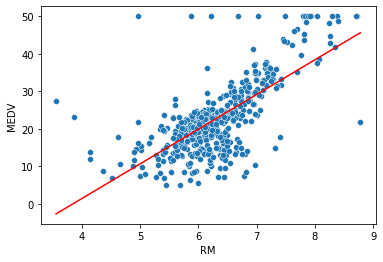

In [15]:
# dokonajmy predykcji używając tylko jednej danej wejściowej
chosen_features = ['RM']
model = split_train_measure(boston, chosen_features, test_ratio, LinearRegression())
# i zwizualizujmy sobie jaką prostą wypluł model
plt.figure()
x_label = chosen_features[0]
ax = sns.scatterplot(x=x_label, y="MEDV", data=boston[[x_label,"MEDV"]])
tmp_x = np.array([[boston[x_label].min(),],[boston[x_label].max(),]])
tmp_y = model.predict(tmp_x)
plt.plot(tmp_x, tmp_y, color='r')

In [16]:
# dokonajmy predykcji bazując na wszystkich dostępnych danych
chosen_features = feature_columns
# oraz stosunek rozmiaru zbioru testowego do całości
test_ratio = 0.25
# odpalamy naszą funkcję i wyciągamy nasz model
model = split_train_measure(boston, chosen_features, test_ratio, LinearRegression())

Sizes: 506 126.5 379 127
Mean squared error on training data: 22.126227442693537
Mean squared error on test data: 21.719706092642877


### Inne modele regresji (las losowy)

In [17]:
# dokonajmy predykcji bazując na wszystkich dostępnych danych (znowu)
chosen_features = feature_columns
# oraz stosunek rozmiaru zbioru testowego do całości
test_ratio = 0.25
# odpalamy naszą funkcję i wyciągamy nasz model (tym razem las)
model = split_train_measure(boston, chosen_features, test_ratio, RandomForestRegressor())

Sizes: 506 126.5 379 127
Mean squared error on training data: 1.7168598232189953
Mean squared error on test data: 11.209638889763783


##### Pytanie do Was: co możemy wywnioskować z wyników MSE?









(podpowiedź: po co nam modele predykcyjne?)









# Zmniejszanie wymiarowości

### Analiza głównych składowych (PCA – Principal Component Analysis)

#### Przydatne linki dla dociekliwych :)

https://en.wikipedia.org/wiki/Principal_component_analysis

https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

**Wizualizacja:** https://setosa.io/ev/principal-component-analysis/

In [18]:
# ładujemy dataset MNIST, tu więcej o nim: https://en.wikipedia.org/wiki/MNIST_database
# zobaczmy, ile to zajmie 

start = time.time()
X, y = fetch_openml('mnist_784', data_home='data', version=1, return_X_y=True)
end = time.time()
print(f"Download time: {end-start}")
print(X.shape)

# pomieszajmy dane 
random_state = check_random_state(2138)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

Download time: 24.27126121520996
(70000, 784)


0.0 255.0
0.0 1.0


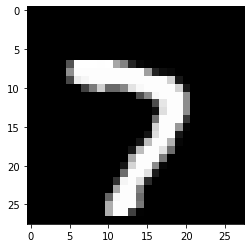

In [19]:
# normalizujemy wartości pikseli
print(np.amin(X),np.amax(X))
X = X/255
print(np.amin(X),np.amax(X))

# i rysujemy przykładowy obrazek ze zbioru
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [20]:
# importujemy niezbędne narzędzia
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA

# i klasycznie już tworzymy funkcję, która nam wszystko ładnie przeliczy :)
def do_stuff(X, y):
    # będzie się liczyć dość długo – sprawdźmy jak
    start_time = time.time()
    # dzielimy na treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2138)
    
    model = LogisticRegression(
        multi_class='multinomial', 
        solver='saga', n_jobs=4) # dlaczego regresja, skoro to problem klasyfikacji?
    
    model.fit(X_train, y_train)
    print('Model trained! Training time:', time.time()-start_time)
    
    print('Model score:', model.score(X_test, y_test)) 

In [21]:
# odpalamy uczenie
do_stuff(X, y)

Model trained! Training time: 168.8319776058197
Model score: 0.9185142857142857


c:\users\antoni\bootcamp\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(70000, 784)
(70000, 50)
(70000, 784)


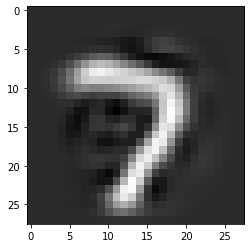

In [22]:
pca = PCA(50)
# Tworzymy transformację na podstawie X i zwracamy dane w mniejszej liczbie wymiarów
projection = pca.fit_transform(X)

# Z reprezentacji w mniejszej liczbie wymiarów wracamy do oryginalnej liczby wymiarów
back_to_the_roots = pca.inverse_transform(projection)

# Sprawdzamy jak zmienił się nasz obrazek
plt.imshow(back_to_the_roots[0].reshape(28,28), cmap='gray')

# Sprawdzamy też wymiary poszczególnych tablic
print(X.shape)
print(projection.shape)
print(back_to_the_roots.shape)

In [23]:
# odpalamy uczenie na zmniejszonej wymiarowości
do_stuff(projection, y)

Model trained! Training time: 8.89526104927063
Model score: 0.9037714285714286
